# Sistemas

Dados los sistemas $ S1, S2, S3, S4 $ se procede a encontrar de forma analitica su respuesta impulsional y su respuesta en frecuencia.

- La **respuesta impulsional** $ h[n] $, que es la salida del sistema cuando la entrada es un **impulso unitario** $ \delta[n] $.  
- La **respuesta en frecuencia** $ H(e^{j\omega}) $, que corresponde a la **Transformada de Fourier en Tiempo Discreto (TFTD)** de $ h[n] $.

## Sistema S1

La ecuación en diferencias del sistema 1 es:

$$
y[n] = \frac{1}{2}x[n] + \frac{1}{2}x[n-1].
$$

La **respuesta impulsional** se obtiene aplicando un **impulso unitario** $ x[n] = \delta[n] $ como entrada. Por definición:

$$
\delta[n] =
\begin{cases}
1 & \text{si } n = 0, \\
0 & \text{si } n \neq 0.
\end{cases}
$$

Sustituyendo $ x[n] = \delta[n] $ en la ecuación:

$$
h[n] = \frac{1}{2}\delta[n] + \frac{1}{2}\delta[n-1].
$$

Esto implica que $ h[n] $ es la suma de dos impulsos desplazados:  
- Un impulso en $ n = 0 $ con coeficiente $ \frac{1}{2} $.  
- Un impulso en $ n = 1 $ con coeficiente $ \frac{1}{2} $.

Por lo tanto, la respuesta impulsional $ h[n] $ es:

$$
h[n] =
\begin{cases}
\frac{1}{2} & \text{si } n = 0, \\
\frac{1}{2} & \text{si } n = 1, \\
0 & \text{en otro caso}.
\end{cases}
$$

La **respuesta en frecuencia** se obtiene aplicando la **Transformada de Fourier en Tiempo Discreto (TFTD)** a $ h[n] $. La definición de la TFTD es:

$$
H(e^{j\omega}) = \sum_{n=-\infty}^{\infty} h[n] e^{-j\omega n}.
$$

Dado que $ h[n] $ tiene valores distintos de cero solo en $ n = 0 $ y $ n = 1 $, sustituimos estos valores en la definición:

$$
H(e^{j\omega}) = \frac{1}{2}e^{-j\omega \cdot 0} + \frac{1}{2}e^{-j\omega \cdot 1}.
$$

Simplificamos los términos exponenciales:  
- $ e^{-j\omega \cdot 0} = 1 $.  
- $ e^{-j\omega \cdot 1} = e^{-j\omega} $.

Por lo tanto:

$$
H(e^{j\omega}) = \frac{1}{2} \left( 1 + e^{-j\omega} \right).
$$

 el **modulo** de $ H(e^{j\omega}) $ se calcula como:

$$
|H(e^{j\omega})| = \sqrt{\text{Re}(H)^2 + \text{Im}(H)^2}.
$$

Sustituyendo $ H(e^{j\omega}) $:

$$
H(e^{j\omega}) = \frac{1}{2} \left( 1 + e^{-j\omega} \right).
$$

Sabemos que $ e^{-j\omega} $ se puede descomponer como $ \cos(\omega) - j\sin(\omega) $. Por lo tanto:

$$
H(e^{j\omega}) = \frac{1}{2} \left( 1 + \cos(\omega) - j\sin(\omega) \right).
$$

La parte real y la parte imaginaria son:  
- Parte real: $ \text{Re}(H) = \frac{1}{2}(1 + \cos(\omega)) $.  
- Parte imaginaria: $ \text{Im}(H) = -\frac{1}{2}\sin(\omega) $.

La magnitud es entonces:

$$
|H(e^{j\omega})| = \frac{1}{2} \sqrt{(1 + \cos(\omega))^2 + \sin^2(\omega)}.
$$

Simplificamos utilizando la identidad trigonométrica $ \cos^2(\omega) + \sin^2(\omega) = 1 $:

$$
|H(e^{j\omega})| = \frac{1}{2} \sqrt{1 + 2\cos(\omega) + 1}.
$$

Simplificando aún más:

$$
|H(e^{j\omega})| = \sqrt{\frac{1 + \cos(\omega)}{2}}.
$$

La **fase** de $ H(e^{j\omega}) $ se calcula como:

$$
\angle H(e^{j\omega}) = \arctan\left( \frac{\text{Im}(H)}{\text{Re}(H)} \right).
$$

Sustituyendo los valores de la parte real e imaginaria:

$$
\angle H(e^{j\omega}) = \arctan\left( \frac{-\sin(\omega)}{1 + \cos(\omega)} \right).
$$

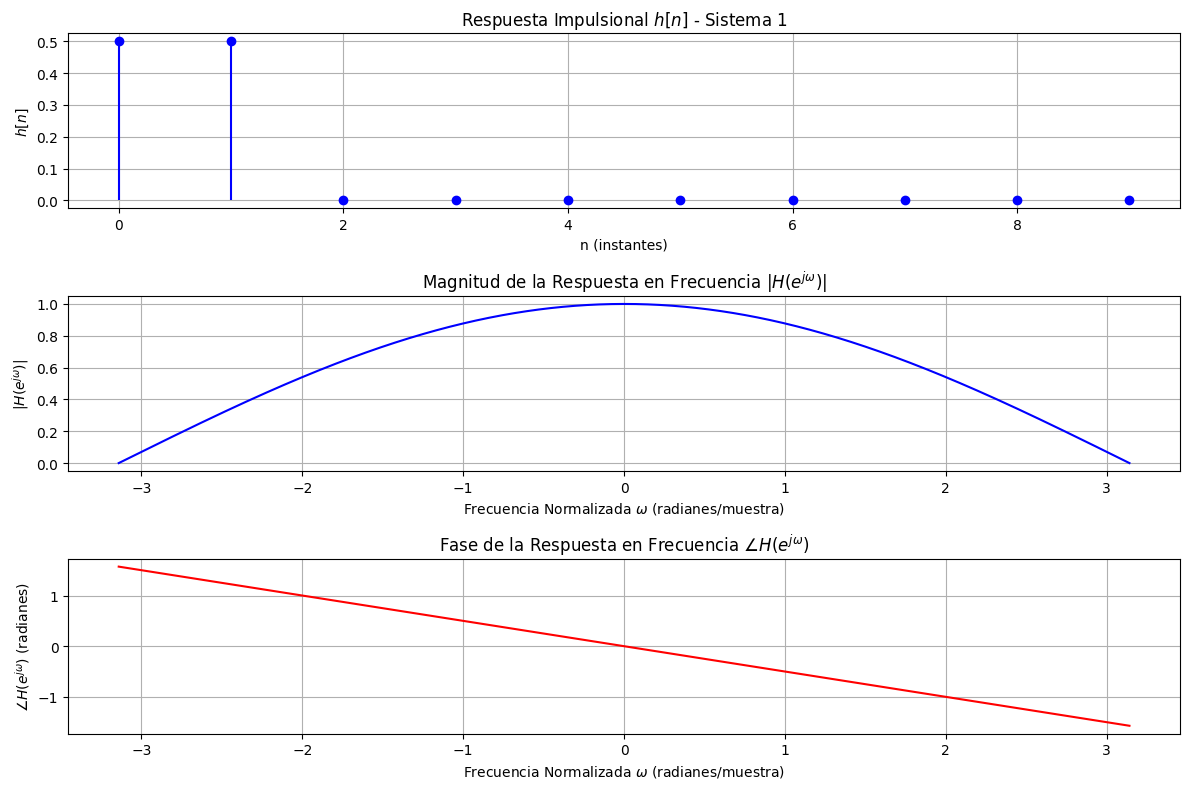

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Respuesta impulsional h[n] - Sistema 1
n = np.arange(0, 10)  # Instantes de tiempo
h = np.zeros_like(n, dtype=float)
h[0] = 0.5  # Valor en n = 0
h[1] = 0.5  # Valor en n = 1

# Respuesta en frecuencia H(e^jw)
omega = np.linspace(-np.pi, np.pi, 1000)  # Frecuencias normalizadas
H = 0.5 * (1 + np.exp(-1j * omega))  # Respuesta en frecuencia

# Calcular magnitud y fase
magnitude = np.abs(H)
phase = np.angle(H)

# Graficar la respuesta impulsional
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 1")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(omega, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Graficar la fase de la respuesta en frecuencia
plt.subplot(3, 1, 3)
plt.plot(omega, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


## Sistema 2

La ecuación de diferencias del **Sistema 2** es:  

$$
y[n] = \frac{1}{2}x[n] - \frac{1}{2}x[n-1].
$$  

La salida del sistema cuando la entrada es $ x[n] = \delta[n] $:  

$$
h[n] = \frac{1}{2}\delta[n] - \frac{1}{2}\delta[n-1].
$$

La Transformada de Fourier de $ h[n] $ es:  

$$
H(e^{j\omega}) = \frac{1}{2}(1 - e^{-j\omega}).
$$

Sustituyendo $ e^{-j\omega} = \cos(\omega) - j\sin(\omega) $, obtenemos:  

$$
H(e^{j\omega}) = \frac{1}{2} \left( 1 - \cos(\omega) + j\sin(\omega) \right).
$$  

**Modulo**:

$$
|H(e^{j\omega})| = \sqrt{\frac{1 - \cos(\omega)}{2}}.
$$

**Fase**:

$$
\angle H(e^{j\omega}) = \arctan\left( \frac{\sin(\omega)}{1 - \cos(\omega)} \right).
$$  

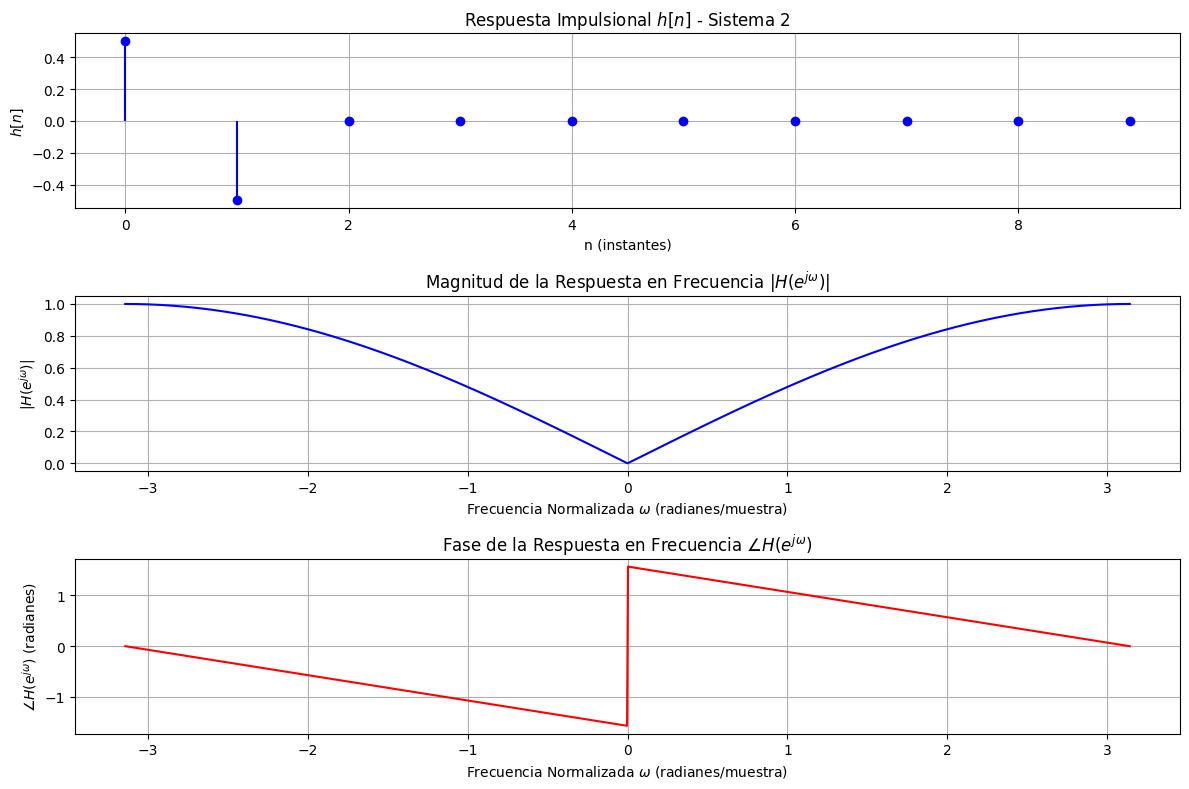

In [23]:

# Respuesta impulsional h[n] - Sistema 2
n = np.arange(0, 10)  # Instantes de tiempo
h = np.zeros_like(n, dtype=float)
h[0] = 0.5  # Valor en n = 0
h[1] = -0.5 # Valor en n = 1

# Respuesta en frecuencia H(e^jw)
omega = np.linspace(-np.pi, np.pi, 1000)  # Frecuencias normalizadas
H = 0.5 * (1 - np.exp(-1j * omega))  # Respuesta en frecuencia

# Calcular magnitud y fase
magnitude = np.abs(H)
phase = np.angle(H)

# Graficar la respuesta impulsional
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 2")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(omega, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Graficar la fase de la respuesta en frecuencia
plt.subplot(3, 1, 3)
plt.plot(omega, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


### **Resolución Analítica del Sistema 3**  

La ecuación de diferencias del **Sistema 3** es:  

$$
y[n] = \frac{1}{4}x[n] + \frac{1}{4}x[n-1] + \frac{1}{2}y[n-1].
$$  

La salida del sistema $ y[n] $ cuando la entrada es $ x[n] = \delta[n] $ se obtiene resolviendo la ecuación en diferencias de manera recursiva.  

Inicialmente, suponemos que $ y[n] = h[n] $ y que:  
- $ x[n] = \delta[n] $: el impulso unitario.  
- $ y[n] = 0 $ para $ n < 0 $ (condición inicial).  

Sustituyendo $ x[n] = \delta[n] $ en la ecuación:  

Para $ n = 0 $:  
$$
h[0] = \frac{1}{4}\delta[0] + \frac{1}{4}\delta[-1] + \frac{1}{2}h[-1].
$$  
Dado que $ \delta[0] = 1 $, $ \delta[-1] = 0 $, y $ h[-1] = 0 $:  
$$
h[0] = \frac{1}{4}.
$$  

Para $ n = 1 $:  
$$
h[1] = \frac{1}{4}\delta[1] + \frac{1}{4}\delta[0] + \frac{1}{2}h[0].
$$  
Sustituyendo $ \delta[1] = 0 $, $ \delta[0] = 1 $, y $ h[0] = \frac{1}{4} $:  
$$
h[1] = \frac{1}{4} \cdot 1 + \frac{1}{2} \cdot \frac{1}{4} = \frac{1}{4} + \frac{1}{8} = \frac{3}{8}.
$$  

Para $ n = 2 $:  
$$
h[2] = \frac{1}{4}\delta[2] + \frac{1}{4}\delta[1] + \frac{1}{2}h[1].
$$  
Sustituyendo $ \delta[2] = 0 $, $ \delta[1] = 0 $, y $ h[1] = \frac{3}{8} $:  
$$
h[2] = \frac{1}{2} \cdot \frac{3}{8} = \frac{3}{16}.
$$  

De manera general, la respuesta impulsional $ h[n] $ es una **secuencia exponencial decreciente**, debido al término recursivo $ \frac{1}{2}y[n-1] $.  

La **respuesta en frecuencia**

$$
H(e^{j\omega}) = \frac{B(e^{j\omega})}{A(e^{j\omega})},
$$  

donde:  
- $ B(e^{j\omega}) $ es el polinomio del numerador correspondiente a $ x[n] $.  
- $ A(e^{j\omega}) $ es el polinomio del denominador correspondiente a $ y[n] $.  

Los coeficientes son:  
- Numerador: $ B(z) = \frac{1}{4} + \frac{1}{4}z^{-1} $.  
- Denominador: $ A(z) = 1 - \frac{1}{2}z^{-1} $.  

Por lo tanto:

$$
H(e^{j\omega}) = \frac{\frac{1}{4} + \frac{1}{4}e^{-j\omega}}{1 - \frac{1}{2}e^{-j\omega}}.
$$

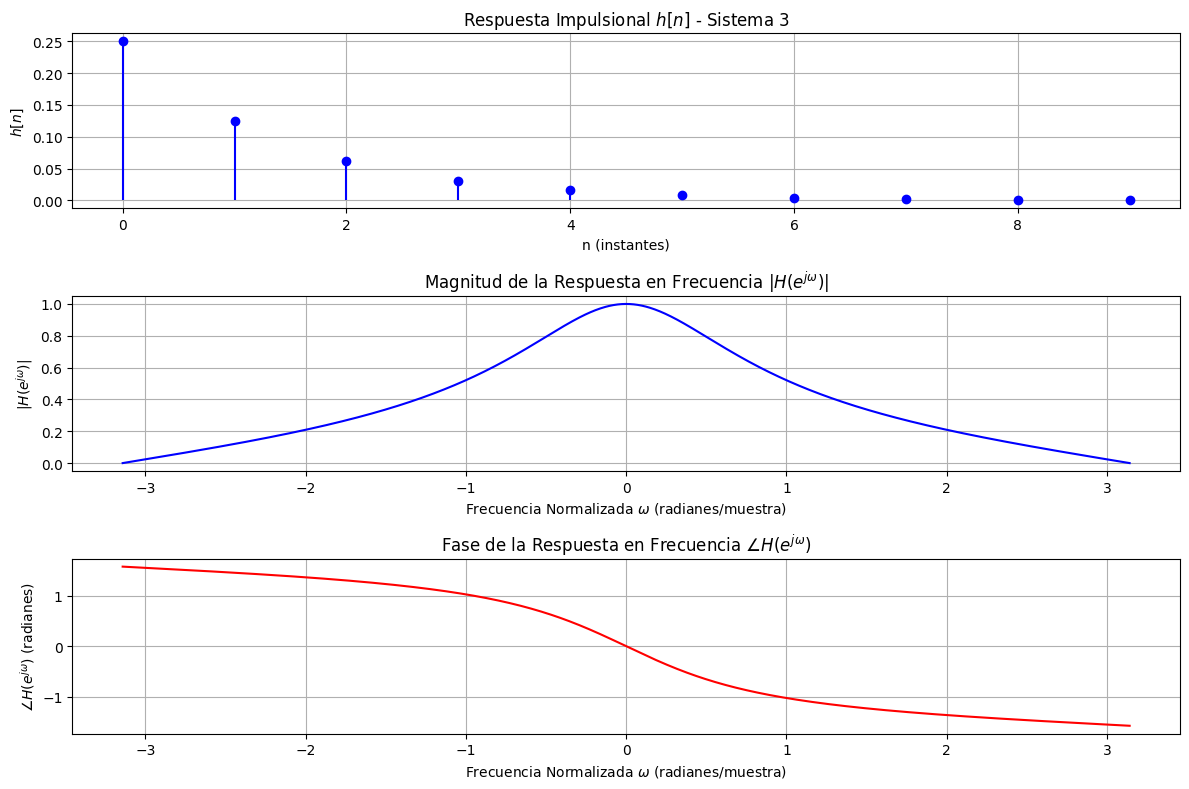

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Respuesta impulsional h[n] - Sistema 3 (exponencial decreciente)
n = np.arange(0, 10)  # Instantes de tiempo
h = (1 / 4) * (1 / 2) ** n  # Respuesta impulsional analítica

# Respuesta en frecuencia H(e^jw)
omega = np.linspace(-np.pi, np.pi, 1000)  # Frecuencias normalizadas
numerator = 0.25 + 0.25 * np.exp(-1j * omega)  # Numerador
denominator = 1 - 0.5 * np.exp(-1j * omega)  # Denominador
H = numerator / denominator  # Respuesta en frecuencia

# Calcular la magnitud y la fase
magnitude = np.abs(H)  # Magnitud de H(e^jw)
phase = np.angle(H)    # Fase de H(e^jw)

# Graficar la respuesta impulsional
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 3")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(omega, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Graficar la fase de la respuesta en frecuencia
plt.subplot(3, 1, 3)
plt.plot(omega, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


### Sistema 4

La ecuación en diferencias del **Sistema 4** es:  

$$
y[n] = \frac{1}{4}x[n] - \frac{1}{4}x[n-1] - \frac{1}{2}y[n-1].
$$  

Para obtener la respuesta impulsional $ h[n] $, aplicamos como entrada el **impulso unitario** $ x[n] = \delta[n] $. La ecuación en diferencias se resuelve de forma recursiva:

**Condiciones iniciales**:
- $ x[n] = \delta[n] $ para $ n = 0 $.  
- $ h[n] = 0 $ para $ n < 0 $.  

1. **Para $ n = 0 $:**  

$$
h[0] = \frac{1}{4}\delta[0] - \frac{1}{4}\delta[-1] - \frac{1}{2}h[-1].
$$

Sustituyendo $ \delta[0] = 1 $, $ \delta[-1] = 0 $, y $ h[-1] = 0 $:  

$$
h[0] = \frac{1}{4}.
$$

2. **Para $ n = 1 $:**  

$$
h[1] = \frac{1}{4}\delta[1] - \frac{1}{4}\delta[0] - \frac{1}{2}h[0].
$$

Sustituyendo $ \delta[1] = 0 $, $ \delta[0] = 1 $, y $ h[0] = \frac{1}{4} $:  

$$
h[1] = -\frac{1}{4} - \frac{1}{2} \cdot \frac{1}{4} = -\frac{1}{4} - \frac{1}{8} = -\frac{3}{8}.
$$

3. **Para $ n = 2 $:**  

$$
h[2] = \frac{1}{4}\delta[2] - \frac{1}{4}\delta[1] - \frac{1}{2}h[1].
$$

Sustituyendo $ \delta[2] = 0 $, $ \delta[1] = 0 $, y $ h[1] = -\frac{3}{8} $:  

$$
h[2] = -\frac{1}{2} \cdot \left( -\frac{3}{8} \right) = \frac{3}{16}.
$$

La secuencia resultante es una **exponencial alternada decreciente** debido al término negativo recursivo $ -\frac{1}{2}y[n-1] $.

**Generalización**:

$$
h[n] = \frac{1}{4} \left( -\frac{1}{2} \right)^n, \; n \geq 0.
$$  

Aplicamos la Transformada de Fourier en Tiempo Discreto (TFTD) a la ecuación en diferencias. La respuesta en frecuencia se calcula como:

$$
H(e^{j\omega}) = \frac{B(e^{j\omega})}{A(e^{j\omega})}.
$$  

Donde:  
- El **numerador** es $ B(z) = \frac{1}{4} - \frac{1}{4}z^{-1} $.  
- El **denominador** es $ A(z) = 1 + \frac{1}{2}z^{-1} $.  

Sustituyendo $ z = e^{j\omega} $, obtenemos:

$$
H(e^{j\omega}) = \frac{\frac{1}{4} - \frac{1}{4}e^{-j\omega}}{1 + \frac{1}{2}e^{-j\omega}}.
$$

- **Magnitud** de $ H(e^{j\omega}) $:

$$
|H(e^{j\omega})| = \frac{\left| \frac{1}{4} - \frac{1}{4}e^{-j\omega} \right|}{\left| 1 + \frac{1}{2}e^{-j\omega} \right|}.
$$

- **Fase** de $ H(e^{j\omega}) $:

$$
\angle H(e^{j\omega}) = \angle \left( \frac{\frac{1}{4} - \frac{1}{4}e^{-j\omega}}{1 + \frac{1}{2}e^{-j\omega}} \right).
$$

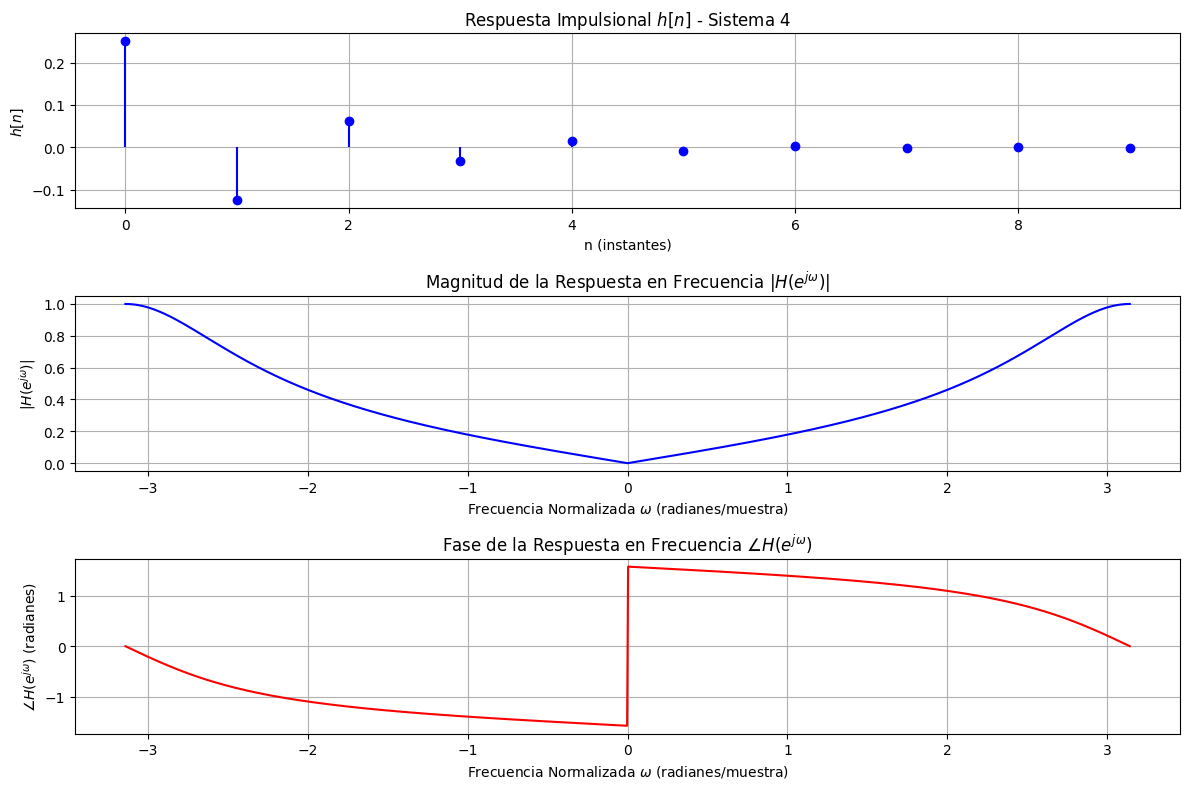

In [25]:
# Respuesta impulsional h[n] - Sistema 4 (exponencial alternada decreciente)
n = np.arange(0, 10)  # Instantes de tiempo
h = (1 / 4) * (-1 / 2) ** n  # Respuesta impulsional analítica

# Respuesta en frecuencia H(e^jw)
omega = np.linspace(-np.pi, np.pi, 1000)  # Frecuencias normalizadas
numerator = 0.25 - 0.25 * np.exp(-1j * omega)  # Numerador
denominator = 1 + 0.5 * np.exp(-1j * omega)    # Denominador
H = numerator / denominator  # Respuesta en frecuencia

# Calcular la magnitud y la fase
magnitude = np.abs(H)
phase = np.angle(H)

# Graficar la respuesta impulsional
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.stem(n, h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 4")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Graficar la magnitud de la respuesta en frecuencia
plt.subplot(3, 1, 2)
plt.plot(omega, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Graficar la fase de la respuesta en frecuencia
plt.subplot(3, 1, 3)
plt.plot(omega, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()
